## Imports

In [2]:
import math as m
!pip install powerlaw
import powerlaw
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats as scp
from scipy.special import factorial
from matplotlib.pyplot import cm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Graphs

In [3]:
amazon_g = nx.read_gml("graph_amazon.gml", label='id')
escort_g = nx.read_gml("graph_escort.gml", label='id')
internet_g = nx.read_gml("graph_internet.gml", label='id')

graph_list = [
    amazon_g,
    escort_g,
    internet_g
    ]

output_strings = [
    "Amazon co-purchased products",
    "Sex Escorts",
    "Internet autonomous systems (AS)"
]

str_n_graphs = list(zip(output_strings, graph_list))

## A05.1  Everyday networks are not Poisson: parameter estimation and model selection

Calculating best minimal value for power law fit
γ for Amazon co-purchased products: 3.5814
Error for Amazon co-purchased products: 0.0335

Calculating best minimal value for power law fit
γ for Sex Escorts: 2.8704
Error for Sex Escorts: 0.0758

Calculating best minimal value for power law fit
γ for Internet autonomous systems (AS): 1.9158
Error for Internet autonomous systems (AS): 0.0132



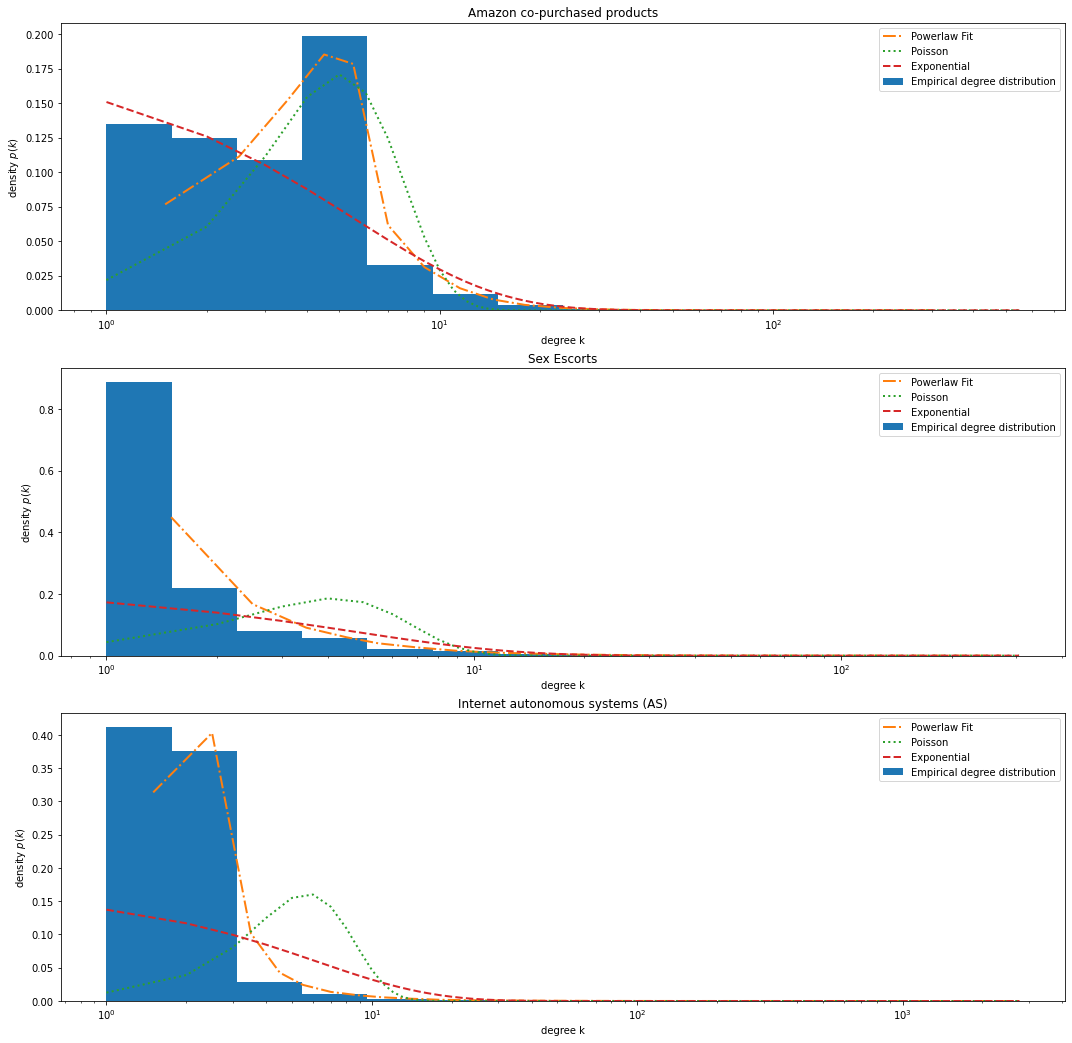

In [6]:
fgsz = 18
figure, axis = plt.subplots(3, 1, figsize=(fgsz, fgsz))

for i, (output_str, graph) in enumerate(str_n_graphs):

  ax = axis[i % 3]

  k_s = np.sort(np.asarray([d for d in dict(graph.degree()).values()]))
  avg_deg = np.mean(k_s)
  fit = powerlaw.Fit(k_s, discrete=True)
  alpha = fit.alpha
  sigma = fit.sigma

  print(f"\u03B3 for {output_str}: {alpha:.4f}")
  print(f"Error for {output_str}: {sigma:.4f}\n")

  # Empirical degree distribution

  my_bins = np.logspace(np.log10(min(k_s)),np.log10(max(k_s) +1), 15) 

  ax.hist(k_s, bins=my_bins, density=True, label="Empirical degree distribution")
  ax.set_title(output_str)
  ax.set_ylabel("density $p(k)$")
  ax.set_xlabel("degree k")

  # Power-law fit

  powerlaw.plot_pdf(data=k_s, ax=ax, linestyle="-.", linewidth="2", label="Powerlaw Fit")
  # fit.power_law.plot_pdf(ax=ax, linestyle="-.", linewidth="2", label="Powerlaw Fit")
  
  # Poisson fit

  poisson = scp.poisson.pmf(k_s, avg_deg)
  ax.plot(k_s, poisson, linestyle=":", linewidth="2", label="Poisson")

  # Exponential distribution

  exponential = scp.expon.pdf(k_s, loc=0, scale=avg_deg)
  ax.plot(k_s, exponential, linestyle="--", linewidth="2", label="Exponential")
  ax.set_xscale("log")
  ax.set_yscale("linear")
  ax.legend()

* Which distribution is more
likely to describe the data?

The power-law approach seems to be most accurate, since it is not as heavy tailed as other distributions and therefore provides a better picture of the actual distribution. Nevertheless, comparability in this graph is somehow a bit distorted, since the empirical degree distribution is plotted with bins. As we've observed in earlier assignments: The chosen amount of bins potentially influences the perception of a distribution.

* What does it mean in practice for Amazon products?


Deriving from the distributions most people tend to co-purchase around 3-7 products with their actual chosen product. This leads to the assumption that it is easier to let people buy a few additional items to one product, but it is harder to let them buy *many* more additional products - the shopping carts are mostly containing an amount of items until a certain limit, in this case less in the range of maximum 5-8, when looking at the chart.



## A05.2 Barabási-Albert model

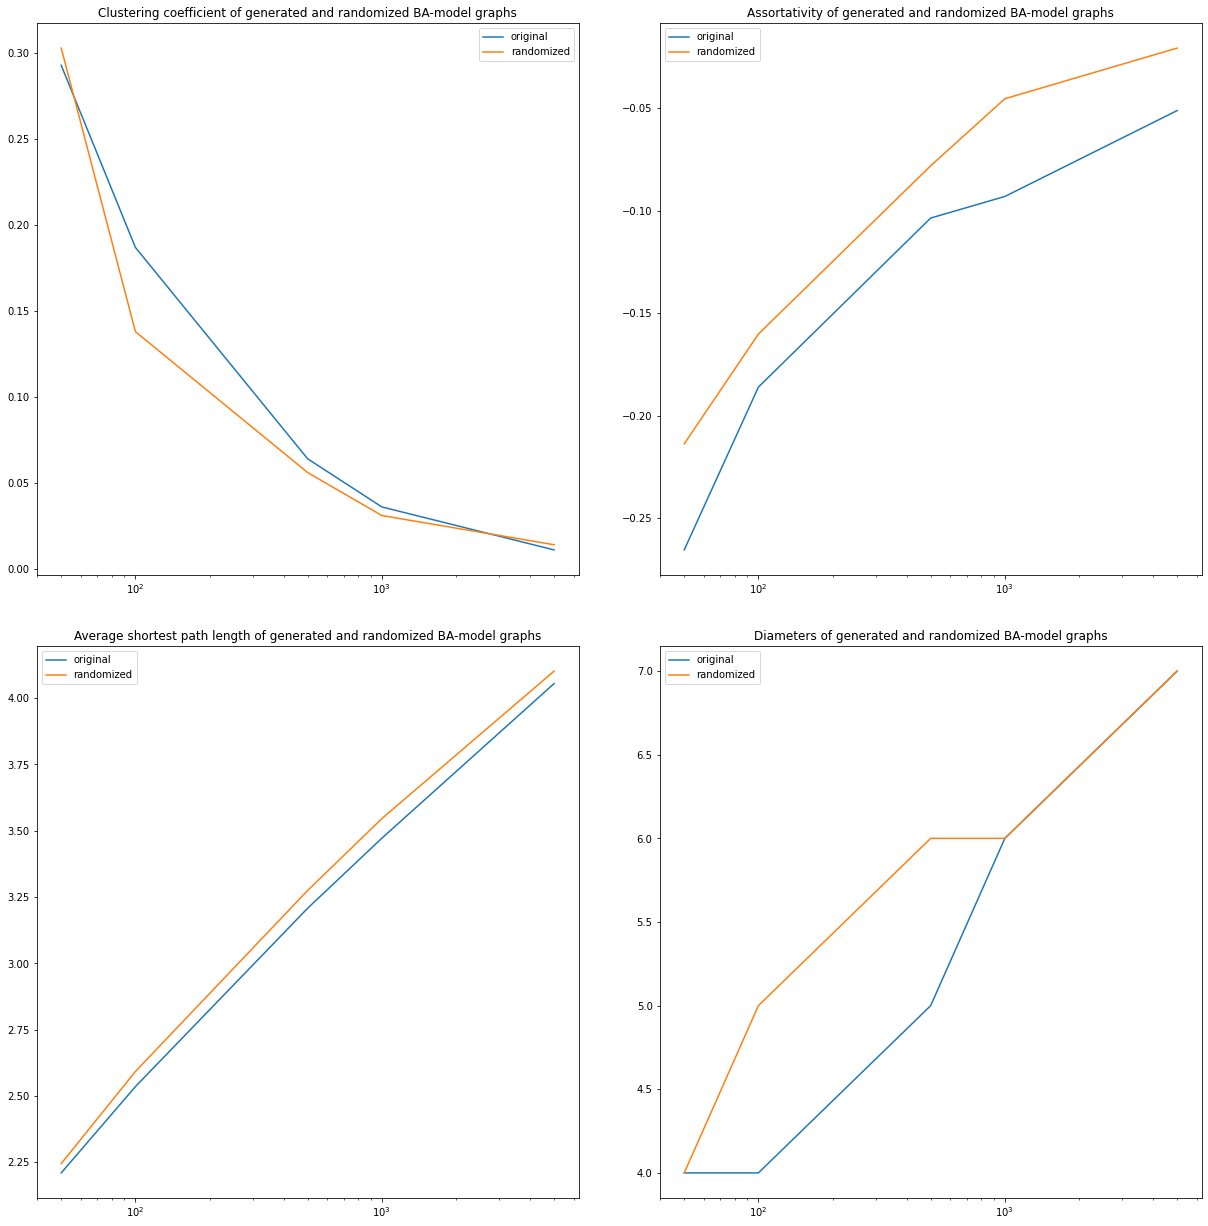

In [38]:
ns = [
    50,
    100,
    500,
    1000,
    5000
]

clustering_coefficients = []
assortativities = []
avg_shortests = []
diams = []

rnd_clustering_coefficients = []
rnd_assortativities = []
rnd_avg_shortests = []
rnd_diams = []

fgsz = 18
figure, axis = plt.subplots(2,2, figsize=(fgsz, fgsz))
figure.tight_layout(pad=5.0)

for n in ns:
  g = nx.barabasi_albert_graph(n,m=3)
  clustering_coefficients.append(nx.approximation.average_clustering(g))
  assortativities.append(nx.degree_assortativity_coefficient(g))
  avg_shortests.append(nx.average_shortest_path_length(g))
  diams.append(nx.diameter(g))

  rnd_g = nx.algorithms.smallworld.random_reference(g, niter = 5, connectivity=False)
  rnd_clustering_coefficients.append(nx.approximation.average_clustering(rnd_g))
  rnd_assortativities.append(nx.degree_assortativity_coefficient(rnd_g))
  rnd_avg_shortests.append(nx.average_shortest_path_length(rnd_g))
  rnd_diams.append(nx.diameter(rnd_g))


ax = axis[0,0]
ax.plot(ns, clustering_coefficients, label="original")
ax.plot(ns, rnd_clustering_coefficients, label="randomized")
ax.set_xscale("log")
ax.set_title("Clustering coefficient of generated and randomized BA-model graphs")
ax.legend()

ax = axis[0,1]
ax.plot(ns, assortativities, label="original")
ax.plot(ns, rnd_assortativities, label="randomized")
ax.set_xscale("log")
ax.set_title("Assortativity of generated and randomized BA-model graphs")
ax.legend()

ax = axis[1,0]
ax.plot(ns, avg_shortests, label="original")
ax.plot(ns, rnd_avg_shortests, label="randomized")
ax.set_xscale("log")
ax.set_title("Average shortest path length of generated and randomized BA-model graphs")
ax.legend()

ax = axis[1,1]
ax.plot(ns, diams, label="original")
ax.plot(ns, rnd_diams, label="randomized")
ax.set_xscale("log")
ax.set_title("Diameters of generated and randomized BA-model graphs")
ax.legend()

plt.show()

The effect of the randomization on the average shortest path is _relatively_ small, since the randomization algorithm swaps edges by definition according to the `niter` argument given. Swapping edges preserves the average shortest path, since no new edges are created and no edges are deleted.

###A05.3 Barabási-Albert model (2)

Calculating best minimal value for power law fit
For m = 2 the estimated parameter is: 3.0740
Calculating best minimal value for power law fit
For m = 3 the estimated parameter is: 2.9325
Calculating best minimal value for power law fit
For m = 4 the estimated parameter is: 3.1127
Calculating best minimal value for power law fit
For m = 5 the estimated parameter is: 3.0468


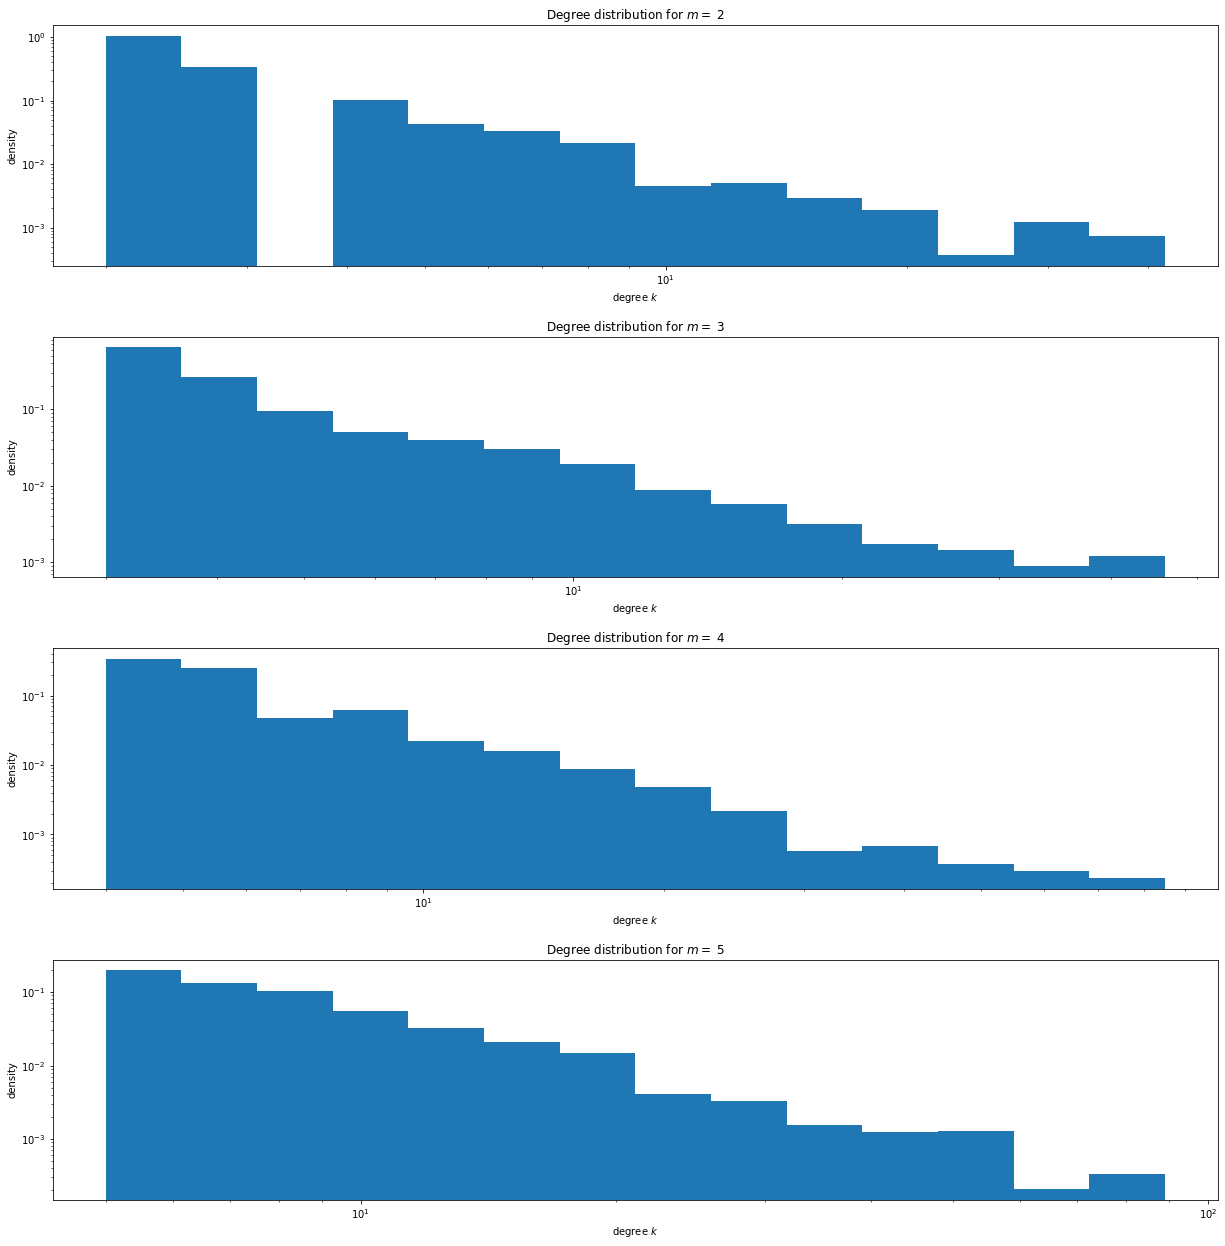

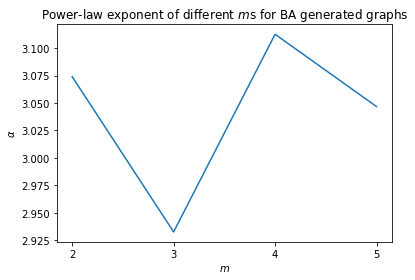

In [39]:
n = 500
ms = [
    2,
    3,
    4,
    5
]

fgsz = 18
figure, axis = plt.subplots(4, figsize=(fgsz, fgsz))
figure.tight_layout(pad=5.0)

alphas = []

for i, m in enumerate(ms):

  ax = axis[i % 4]

  g = nx.barabasi_albert_graph(n,m=m)

  degs = np.sort(np.asarray([d for d in dict(g.degree()).values()]))
  my_bins = np.logspace(np.log10(min(degs)),np.log10(max(degs) +1), 15) 

  ax.hist(degs, bins=my_bins, density=True)
  ax.set_xscale("log")
  ax.set_yscale("log")
  ax.set_xlabel("degree $k$")
  ax.set_ylabel("density")
  ax.set_title(f"Degree distribution for $m =$ {m}")

  fit = powerlaw.Fit(degs)
  alpha = fit.alpha
  alphas.append(alpha)

  print(f"For m = {m} the estimated parameter is: {alpha:.4f}")

plt.figure()

plt.plot(ms, alphas)
plt.xlabel("$m$")
plt.ylabel(r"$\alpha$")
plt.title("Power-law exponent of different $m$s for BA generated graphs")
plt.xticks(np.arange(min(ms), max(ms)+1, 1.0))

plt.show()